Predict the CaCO3 and TOC using both new models and previous models (trained without new data) on the whole spetra.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Read spe dataset and models

In [2]:
spe_df = pd.concat([pd.read_csv('data/spe_dataset_20201215.csv', index_col=0),
                      pd.read_csv('data/spe_dataset_20201008.csv', index_col=0)],
                     axis=0, join='inner')
spe_df

,0,1,2,3,4,5,6,7,8,9,...,2044,2045,2046,2047,cps,core,composite_depth_mm,section_depth_mm,filename,section
composite_id,,,,,,,,,,,,,,,,,,,,,
LV28-44-3_00010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,LV28-44-3,10,10,LV28-44-3_0000 10.0mm 12s 10kV 1200uA F1.spe,0
LV28-44-3_00020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,LV28-44-3,20,20,LV28-44-3_0000 20.0mm 12s 10kV 1200uA F1.spe,0
LV28-44-3_00030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,LV28-44-3,30,30,LV28-44-3_0000 30.0mm 12s 10kV 1200uA F1.spe,0
LV28-44-3_00040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,LV28-44-3,40,40,LV28-44-3_0000 40.0mm 12s 10kV 1200uA F1.spe,0
LV28-44-3_00050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,LV28-44-3,50,50,LV28-44-3_0000 50.0mm 12s 10kV 1200uA F1.spe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO264-76-1_04370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,58656,SO264-76-1,4370,1120,SO264-76-1_0325 1120.0mm 10s 10kV 150uA No-F...,3
SO264-76-1_04380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,54854,SO264-76-1,4380,1130,SO264-76-1_0325 1130.0mm 10s 10kV 150uA No-F...,3
SO264-76-1_04390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,57354,SO264-76-1,4390,1140,SO264-76-1_0325 1140.0mm 10s 10kV 150uA No-F...,3


In [3]:
X = spe_df.iloc[:, :2048].values
X = X / X.sum(axis = 1, keepdims = True)

In [4]:
spe_df.columns[-5:]

Index(['core', 'composite_depth_mm', 'section_depth_mm', 'filename',
       'section'],
      dtype='object')

In [5]:
from joblib import load
m_caco3 = load('models/caco3_nmf+svr_model_20201216.joblib')
m_toc_rf = load('models/toc_nmf+rf_model_20201216.joblib')
m_toc_svr = load('models/toc_nmf+svr_model_20201215.joblib')

# Predict

In [7]:
y_caco3 = np.exp(m_caco3.predict(X))
y_toc_rf = np.exp(m_toc_rf.predict(X))
y_toc_svr = np.exp(m_toc_svr.predict(X))

# Build dataset

In [8]:
predict_df = spe_df.iloc[:, -5:].copy()
predict_df['CaCO3 prediction (%)'] = y_caco3
predict_df['TOC-rf prediction (%)'] = y_toc_rf
predict_df['TOC-svr prediction (%)'] = y_toc_svr

# Check

In [12]:
mask = (predict_df['CaCO3 prediction (%)'] > 100) | (predict_df['TOC-rf prediction (%)'] > 100) | (predict_df['TOC-svr prediction (%)'] > 100)

print('There are {} ({:.2f} %) predictions having values over 100.'.format(len(predict_df[mask]), len(predict_df[mask])/len(predict_df)*100))

There are 16 (0.04 %) predictions having values over 100.


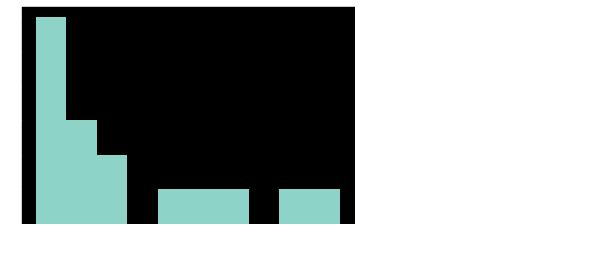

In [11]:
plt.hist(predict_df.loc[predict_df['CaCO3 prediction (%)'] > 100, 'CaCO3 prediction (%)'])
plt.text(200, 5, '{} points have CaCO{} > 100'.format(len(predict_df[predict_df['CaCO3 prediction (%)'] > 100]), r'${_3}$'));
plt.xlabel('concentration (%)');

In [13]:
predict_df.to_csv('results/predict_{}.csv'.format(date))

# Ues previous models to predict new cores
Just test the performance of the models trained without new data on new data. It's not good as expected because of extrapolation.

In [9]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
# All data points contain TOC
X = merge_df.iloc[:, : -5].values
X = X / X.sum(axis = 1, keepdims = True)
y = merge_df['TOC%'].values

In [3]:
spe_df.columns[-5:]

Index(['core', 'composite_depth_mm', 'section_depth_mm', 'filename',
       'section'],
      dtype='object')

In [3]:
from joblib import load
m_caco3 = load('models/caco3_nmf+svr_model_20201013.joblib')
m_toc = load('models/toc_nmf+svr_model_20201013.joblib')
m_tc = load('models/tc_nmf+svr_model_20201013.joblib')

In [4]:
y_toc = np.exp(m_toc.predict(X))
y_tc = np.exp(m_tc.predict(X))

In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y, y_toc)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y, y_toc)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y, y_toc)))

Scores in the test set:
R2 = 0.194 .
The mean absolute error is 0.212 (%, concetration).
The max. residual error is 1.199 (%, concetration).


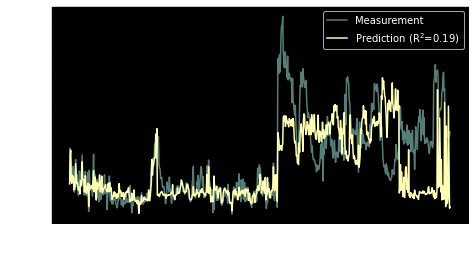

In [6]:
plt.figure(figsize=(7.5, 4))
plt.plot(range(len(y)), y, alpha=0.6, label='Measurement')
plt.plot(range(len(y_toc)), y_toc, label='Prediction (R$^2$={:.2f})'.format(r2_score(y, y_toc)))
plt.ylabel('TOC concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
plt.savefig('results/toc_check_nmr+svr_{}.png'.format(date))

In [12]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
merge_df = merge_df[merge_df.core != 'SO178-12-3']
X = merge_df.iloc[:, : -5].values
X = X / X.sum(axis = 1, keepdims = True)
y = merge_df['CaCO3%'].replace(0, 0.01).values
y_caco3 = np.exp(m_caco3.predict(X))

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y, y_caco3)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y, y_caco3)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y, y_caco3)))

Scores in the test set:
R2 = 0.911 .
The mean absolute error is 4.839 (%, concetration).
The max. residual error is 50.121 (%, concetration).


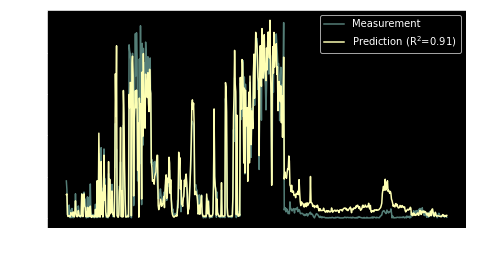

In [14]:
plt.figure(figsize=(7.5, 4))
plt.plot(range(len(y)), y, alpha=0.6, label='Measurement')
plt.plot(range(len(y_caco3)), y_caco3, label='Prediction (R$^2$={:.2f})'.format(r2_score(y, y_caco3)))
plt.ylabel('CaCO3 concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
plt.savefig('results/caco3_check_nmr+svr_{}.png'.format(date))